# SNLP 2021 Final Project 

Submitted by

Name 1:Anush Onkarappa

Student id 1:7010620

Email 1:anon00001@stud.uni-saarland.de

Name 2:Rahul Mudambi Venkatesh

Student id 2:7015710

Email 2:ramu00001@stud.uni-saarland.de

### Instructions: 
Please clone the project from github repository https://github.com/Anush-Onkar/SNLP_Project and use the same IPYNB file present in the repository to run rest of the project.
Also Please extract bengali.zip file in the folder rnnlms/Text_Gen to get generated and decoded files for bengali, as the file size>100MB we couldn't push to github.

## **1 Data Preparation**

We have used corpora `data/bengali_corpus.txt` and `data/alice_in_wonderland.txt`.

### Command to run preproccessing and splitting of corpus into train & test(20%)

In [1]:
#For English corpus
!python preprocess_english.py

Preprocessed english corpus
Output in folder - preprocessed/english


In [2]:
#For Bengali corpus
!python preprocess_bengali.py

Preprocessed bengali corpus
Output in folder - preprocessed/bengali


## **2 Subword Segmentation**

### Command to generate subwords for both English and Bengali
Syntax for the command- python subwords.py **langauge** **vocabsize**

In [ ]:
#For English corpus
!python subwords.py english 49  #here 49 is the vocabsize

In [ ]:
#For Bengali corpus
!python subwords.py bengali 70  #here 70 is the vocabsize

Resulting files: `en_s1.txt`, `en_s2.txt`, `en_s3.txt`, `bn_s1.txt`, `bn_s2.txt` and `bn_s3.txt` can be found in the current directory 

Trails for the above task to find the best performing vocabulary size for `s2` and `s3` can be found in folder `rnnlms/temp_models`

### Observation on Word Segmentation

It can be seen that the generated subword files have a new character "_". This indicates the beginning of words, which is necessary for Bype-Pair Encoding. For s1, all the characters are separated, which indicates character-level tokenization. For s2, few characters were grouped, while for s3, more characters were grouped and the tokens were close to words.

## **3 LM Training**

In [7]:
#to move to the training folder
%cd rnnlms

/home/snlp-project-21/SNLP_Project/rnnlms


In [ ]:
#example command to train LM 
!/home/snlp-project-21/rnnlm/rnnlm \
    -train ../subwords/english/32.txt \
    -valid ../subwords/english/32_test.txt \
    -rnnlm model \
      -hidden 40 \
      -rand-seed 1 \
      -debug 2 \
      -bptt 3 \
      -class 32



The above command is run for the baseline first. The model and output is moved to:
* s1_bengali/bengali_49 - for subwords s1, bengali
* s2_bengali/bengali_100 - for subwords s2, bengali
* s3_bengali/bengali_1700 - for subwords s3, bengali
* s1_english/english_32 - for subwords s1, english
* s2_english/english_100 - for subwords s2, english
* s3_english/english_2600 - for subwords s3, english

Then, hyperparameter tuning is done, which is discussed in the summary.
The models and outputs for the tuning are moved to:
* s1_bengali/Trials - for subwords s1, bengali
* s2_bengali/Trials - for subwords s2, bengali
* s3_bengali/Trials - for subwords s3, bengali
* s1_english/Trials - for subwords s1, english
* s2_english/Trials - for subwords s2, english
* s3_english/Trials - for subwords s3, english


## **4 Text Generation**

In [9]:
#to move to text generation folder
%cd Text_Gen


/home/snlp-project-21/SNLP_Project/rnnlms/Text_Gen


The train and test files should be copied to: 
    
    data/english for english
    data/bengali for bengali

and renamed suitably(this is already done)

The best perfoming model should be copied to : 
    
    models/english for english
    models/bengali for bengali

and renamed suitably(this is already done)

The corresponding sentence speech model should be copied to : 
    
    SP_models/english for english
    SP_models/bengali for bengali

and renamed suitably(this is already done)

Now we can run the text generation script

In [ ]:
%cd script
!./test_english_s1.sh
!./test_english_s2.sh
!./test_english_s3.sh
!./test_bengali_s1.sh
!./test_bengali_s2.sh
!./test_bengali_s3.sh
%cd ..

The generated text files are stored in temp folder which are moved to 

    s1_bengali/ for subwords s1, bengali
    s2_bengali/ for subwords s2, bengali
    s3_bengali/ for subwords s3, bengali
    s1_english/ for subwords s1, english
    s2_english/ for subwords s2, english
    s3_english/ for subwords s3, english

Now we have to decode the generated text files 

Syntax for the command-python decode.py **inputdirectory** 

In [12]:
#example command 
!python decode.py s1_english

Starting decoding
Decoding done
Decoded files are stored in the same directory as the generated files
Example of decoded file - s1_100.txt


### Observation of generated texts of size 100 for both languages

Examining s1_100.txt for all the models, we can observe that quality and understandability of the generated text for english increased from s1 to s3. This is because the subwords in s3 are closer to words. Thus the probability of more correct words being generated is high for this case. The quality is least for s1, as it is on a character-level. Thus, during generation combinations of characters which have no meaning can occur frequently. The observation is similar to bengali as we could find more complete words for s3. 

## **5 OOV comparison**

In [13]:
#to move to the OOV-Comparison folder
%cd ..
%cd OOV_Comparison/

/home/snlp-project-21/SNLP_Project/rnnlms
/home/snlp-project-21/SNLP_Project/rnnlms/OOV_Comparison


In [14]:
#This will print the OVV rate of english and bengali respectively for train data without any Augmentation
!python task5.py english no #no is passed here to indicate no Augmentation of the data
!python task5.py bengali no #no is passed here to indicate no Augmentation of the data

print("-----------------------------------------")

#It also plots the OVV rates against k, here k=0 indicates no Augmentation 
!python task5.py english yes #yes is passed here to indicate Augmentation of the data with the previously generated data
!python task5.py bengali yes #yes is passed here to indicate Augmentation of the data with the previously generated data

OOV for english, without augmenting train data =  0.11930442438917015
OOV for bengali, without augmenting train data =  0.1350314923518574
-----------------------------------------
OOV for english, Subwords granularity 1, k 10 =  0.11864406779661017
OOV for english, Subwords granularity 2, k 10 =  0.11930442438917015
OOV for english, Subwords granularity 3, k 10 =  0.11930442438917015
--------------------------------------------------------
OOV for english, Subwords granularity 1, k 100 =  0.11930442438917015
OOV for english, Subwords granularity 2, k 100 =  0.11930442438917015
OOV for english, Subwords granularity 3, k 100 =  0.11930442438917015
--------------------------------------------------------
OOV for english, Subwords granularity 1, k 1000 =  0.11930442438917015
OOV for english, Subwords granularity 2, k 1000 =  0.11930442438917015
OOV for english, Subwords granularity 3, k 1000 =  0.11556240369799692
--------------------------------------------------------
OOV for english, S

Matplotlib is building the font cache; this may take a moment.


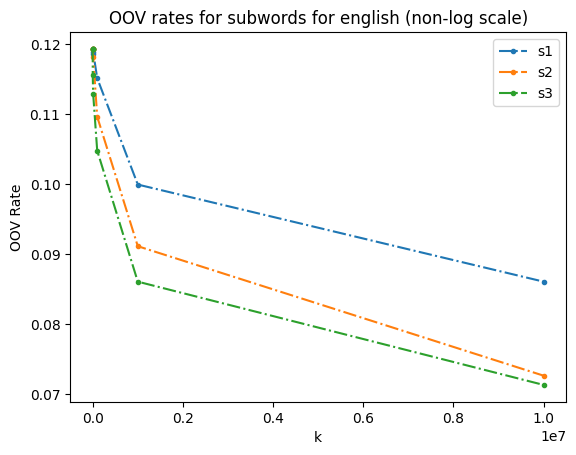

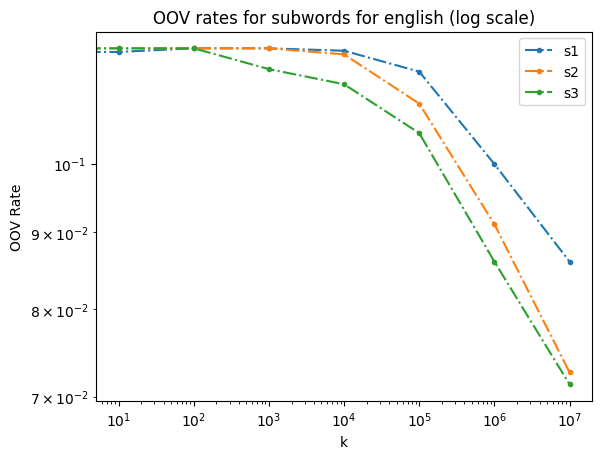

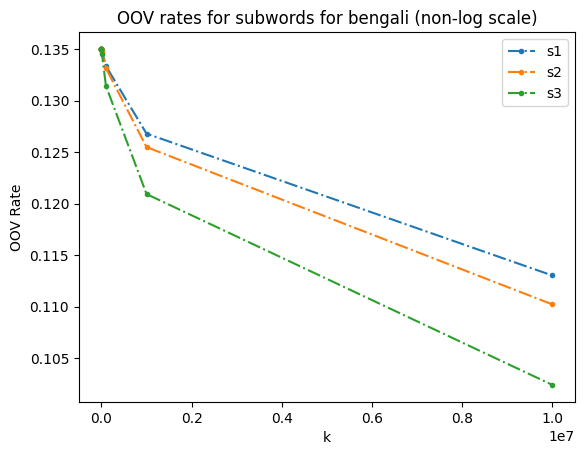

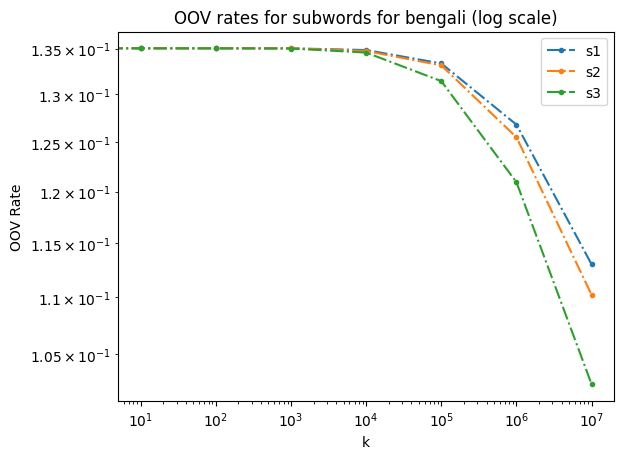

In [19]:
from matplotlib import pyplot as plt
from augment_vocab import augment

# Graph Plotting
for language in ["english", "bengali"]:
    s1 = [augment(language, "")]
    s2 = [augment(language, "")]
    s3 = [augment(language, "")]

    k_vals = [10,100,1000,10000,100000,1000000,10000000]

    for k in k_vals:
        s1.append(augment(language, "../Text_Gen/s1_{}/s1_{}.txt".format(language,k)))
        s2.append(augment(language, "../Text_Gen/s2_{}/s2_{}.txt".format(language,k)))
        s3.append(augment(language, "../Text_Gen/s3_{}/s3_{}.txt".format(language,k)))


    #-----------
    f1 = plt.figure()
    ax1 = f1.add_subplot(111)
    ax1.set_xlabel("k")
    ax1.set_ylabel("OOV Rate")
    ax1.set_title("OOV rates for subwords for {} (non-log scale)".format(language))

    y_vals = s1
    x_vals = [0] + k_vals
    ax1.plot(x_vals,y_vals,"-..")

    y_vals = s2
    x_vals = [0] + k_vals
    ax1.plot(x_vals,y_vals,"-..")

    y_vals = s3
    x_vals = [0] + k_vals
    ax1.plot(x_vals,y_vals,"-..")

    plt.legend(["s1","s2","s3"])

    # plt.show()

    #-----------


    #-----------
    f1 = plt.figure()
    ax1 = f1.add_subplot(111)
    ax1.set_xlabel("k")
    ax1.set_ylabel("OOV Rate")
    ax1.set_title("OOV rates for subwords for {} (log scale)".format(language))

    y_vals = s1
    x_vals = [0] + k_vals
    ax1.loglog(x_vals,y_vals,"-..")

    y_vals = s2
    x_vals = [0] + k_vals
    ax1.loglog(x_vals,y_vals,"-..")

    y_vals = s3
    x_vals = [0] + k_vals
    ax1.loglog(x_vals,y_vals,"-..")

    plt.legend(["s1","s2","s3"])

    plt.show()

    #-----------

### Observation from the plots:

* With increase in k(size of the generated corpus) OOV rates  for the 3 models decreases
* It can be seen that the OOV rates are the least for model augmented with subwords closer to words(s3)
* For English language, the difference between subwords s2 and s3 is smaller than that for Bengali
* For any practical application we can use s3 as OOV rate is the least.


## **6. Analysis**

The aim of this project is to overcome/alleviate the problem of Out Of Vocabulary(OOV) words, while building a language model. The approach used in this project is as follows:

* First, train a RNN language model with subword tokens generated from the corpora. Tune the hyperparameters of the model
* Use the RNN model trained to synthesize artificial text.
* Augment the train data of the corpus with the generated text and calculate the OOV rates.

The two natural laguages used in this project are English and Bengali.

The project was divided into five tasks which are discussed as follows:

* **Data Preperation** In this step, the respective corpora for English and Bengali were preprocessed and divided into train and test files, with test files consisting of 20% of the sentences of corpus of each language.


* **Subword Segmentation** In this step, the SentencePiece text tokenizer was used for different vocabulary sizes, which implements Byte-Pair Encoding, on the sentences in the train files for each language. Three types of subword segmentation was performed in this case for each language: charater-level(s1), subwords close to characters(s2), and subwords close to words(s3). On experimenting with various vocabulary sizes (this can be found in `subwords/english` and `subwords/bengali`, and in `rnnlms/temp_models` directories), the optimal vocabulary sizes were found to be as follows:

    * For s1, for english, the vocabulary size was 32
    * For s2, for english, the vocabulary size was 100
    * For s3, for english, the vocabulary size was 2600
     
    * For s1, for bengali, the vocabulary size was 49
    * For s2, for bengali, the vocabulary size was 100
    * For s3, for bengali, the vocabulary size was 1700
    
    
* **LM Training** In this step, RNNLMs were trained on s1, s2 and s3 for both languages and the hyperparameters were tuned to optimize Perplexities/OOV Rates. A brief description of the hyperparameter is given below:

    * For s1, English baseline vocab size was found to be 32 which gave optimum Perplexity of 5.3491. 
    To further reduce the Perplexity value Hyper parameter tuning was done on parameters BPTT and Hidden layers. For BPTT=4 & H=80 best performance Perplexity value 4.666 was obtained.It was also observed that with decrease in BPTT value, Perplexity value increased and with Hidden layer value >80 PL value decreased negligibly.  
    All the trails carried out can be found in the `Trails` folder of `s1_english`.

    * For s2, English baseline vocab size was found to be 100 which gave optimum Perplexity of 16.4355. 
    To further reduce the Perplexity value Hyper parameter tuning was done on parameters BPTT and Hidden layers. For BPTT=1 & H=80 best performance Perplexity value 14.232 was obtained. It was also observed that with decrease in BPTT value, Perplexity value decreased and with Hidden layer value >80 PL value decreased negligibly.  
    All the trails carried out can be found in the `Trails` folder of `s2_english`.

    * For s3, English baseline vocab size was found to be 2600 which gave optimum Perplexity of 195.5279. 
    To further reduce the Perplexity value Hyper parameter tuning was done on parameters BPTT and Hidden layers. For BPTT=4 & H=40 best performance Perplexity value 195.0037 was obtained. It was also observed that with decrease in BPTT value and increase in Hidden layer value, Perplexity value increased.
    All the trials carried out can be found in the `Trails` folder of `s3_english`.

    * For s1, Bengali baseline vocab size was found to be 49 which gave optimum Perplexity of 7.7006. 
    To further reduce the Perplexity value Hyper parameter tuning was done on parameters BPTT and Hidden layers. For BPTT=4 & H=130 best performance Perplexity value 5.839 was obtained.It was also observed that with decrease in BPTT value, Perplexity value increased and with Hidden layer value >130 PL value decreased negligibly. 
    All the trails carried out can be found in the `Trails`folder of `s1_bengali`.

    * For s2, Bengali baseline vocab size was found to be 100 which gave optimum Perplexity of 17.9806. 
    To further reduce the Perplexity value Hyper parameter tuning was done on parameters BPTT and Hidden layers. For BPTT=3 & H=100 best performance Perplexity value 13.623 was obtained.It was also observed that with decrease in BPTT value, Perplexity value increased and with Hidden layer value >100 PL value decreased negligibly. 
    All the trails carried out can be found in the `Trails` folder of `s2_bengali`.

    * For s3, Bengali baseline vocab size was found to be 1700 which gave optimum Perplexity of 228.5574. 
    To further reduce the Perplexity value Hyper parameter tuning was done on parameters BPTT and Hidden layers. For BPTT=4 & H=50 best performance Perplexity value 228.2559 was obtained.It was also observed that with decrease in BPTT value, Perplexity value increased and with Hidden layer value >50 PL value increased.  
    All the trails carried out can be found in the `Trails` folder of `s3_bengali`


* **Text Generation** In this step, each of the RNNLM models trained (for each language, each of the subword-segmentation types) were used to synthesize artificial texts, with corpus sizes ranging from 10,100,...,10000000. It was observed that the quality of the texts generated increased from s1 to s3.


* **OOV Comparison** In this step, the OOV rates were calculated by augemnting the train data with the generated data(of different sizes), for each of the models and we plotted for comparison. The OOV rates for all models (for both languages) decreased with increased size of the generated data augmented. Overall, the OOV rates were more for Bengali than English, as Bengali is morphologically richer than English and thus has more syntactic and semantic constructs.

To conclude, handling OOV words is important while building a language model, as they result in vanishing MLEs. OOV rates can be reduced by augmenting artificial data to train data, which in this project, is achieved using RNNLMs. Possible improvements/future work include:

* Experimenting with different subword tokenizers and comparing the results, to improve the tokenization (Eg. Bert Tokenizer)
* Experiment with other Neural Language Models